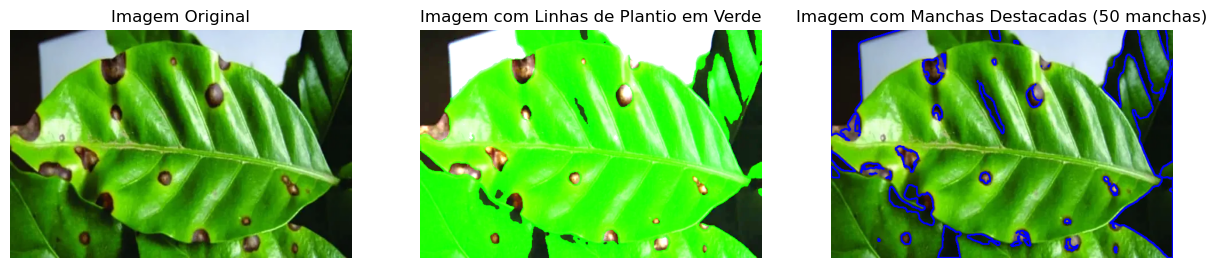

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('image.png')

image_gaussian = cv2.GaussianBlur(image, (5, 5), 0)

hsv = cv2.cvtColor(image_gaussian, cv2.COLOR_BGR2HSV)

lower_green = np.array([30, 40, 40])
upper_green = np.array([90, 255, 255])
green_mask = cv2.inRange(hsv, lower_green, upper_green)


green_colored = image.copy()
green_colored[green_mask != 0] = [0, 255, 0]
highlighted_image = cv2.addWeighted(green_colored, 1, image, 1, 0)


lower_yellow = np.array([20, 100, 100])
upper_yellow = np.array([30, 255, 255])


lower_brown = np.array([10, 100, 20])
upper_brown = np.array([20, 255, 200])


lower_black = np.array([0, 0, 0])
upper_black = np.array([180, 255, 50])

yellow_mask = cv2.inRange(hsv, lower_yellow, upper_yellow)
brown_mask = cv2.inRange(hsv, lower_brown, upper_brown)
black_mask = cv2.inRange(hsv, lower_black, upper_black)

combined_mask = cv2.bitwise_or(yellow_mask, brown_mask)
combined_mask = cv2.bitwise_or(combined_mask, black_mask)

contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

spots_image = image.copy()
cv2.drawContours(spots_image, contours, -1, (255, 0, 0), 2)

spots_count = len(contours)


plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.title("Imagem Original")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Imagem com Linhas de Plantio em Verde")
plt.imshow(cv2.cvtColor(highlighted_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f"Imagem com Manchas Destacadas ({spots_count} manchas)")
plt.imshow(cv2.cvtColor(spots_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.show()



